# Which companies will go bankrupt? We use 7 Machine Learning models to find out, working with a dataset of 7000 Polish companies

![image of business](https://www.indiafilings.com/learn/wp-content/uploads/2017/11/Business-Loss-Carry-Forward.jpg)

##### In today's rather bleak landscape, companies, lenders, and investors have undertaken considerable amounts of research to look into how they can use statistical models to proactively monitor and predict the likelihood of bankruptcy.

By taking data - such as gross margin, debt to assets, and cash flow - and plugging it into programs to process the information, financial analysts have been able to create parametric and non-parametric models for assessing risk. These rather traditional models allow companies to determine whether they should continue working with certain partners, vendors, or clients. Banks and other lenders also use these insights to assess whether an organisation is a suitable candidate for a commercial loan, while investors can decide if they are going to buy or sell stock in a company.

However, while hugely valuable, these models require extensive analysis which is not only time consuming but also the source of inaccuracies. With the ability to process and analyse large amounts of data quickly, recognise patterns and form intelligent decisions, could artificial intelligence (AI) and machine learning provide a better alternative? 

### Given the right data, we could accurately predict bankruptcies years ahead of an event occurring - a task which would have been nearly impossible by manually reviewing the data and using traditional statistical methods.
Machine learning can uncover hidden patterns in this data and give businesses the insight they need, allowing an organisation to move from saying from ‘I think' to ‘I know'

In [1]:
#We start our study by importing the required libraries and graphic interfaces
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#we use year 1 of a dataset of 7000 records of bankruptcy data of Polish companies
#we open the file, build the dataframe and have a look at the records

df = pd.read_csv('polish_cies_bankruptcy_10krecords.csv')
df.head()

,X1 net profit / total assets,X2 total liabilities / total assets,X3 working capital / total assets,X4 current assets / short-term liabilities,X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X6 retained earnings / total assets,X7 EBIT / total assets,X8 book value of equity / total liabilities,X9 sales / total assets,X10 equity / total assets,...,X56 (sales - cost of products sold) / sales,X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),X58 total costs /total sales,X59 long-term liabilities / equity,X60 sales / inventory,X61 sales / receivables,X62 (short-term liabilities *365) / sales,X63 sales / short-term liabilities,X64 sales / fixed assets,Bankruptcy
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


In [3]:
#we get rid of null values
df.replace('?', -9999, inplace=True)

In [4]:
#and explore the dataset further
df.describe()

,X13 (gross profit + depreciation) / sales,X19 gross profit / sales,X20 (inventory * 365) / sales,X23 net profit / sales,X30 (total liabilities - cash) / sales,X31 (gross profit + interest) / sales,X39 profit on sales / sales,X42 profit on operating activities / sales,X43 rotation receivables + inventory turnover in days,X44 (receivables * 365) / sales,X49 EBITDA (profit on operating activities - depreciation) / sales,X55 working capital,X56 (sales - cost of products sold) / sales,X58 total costs /total sales,X62 (short-term liabilities *365) / sales,Bankruptcy
count,7027.000000,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7.027000e+03,7.027000e+03,7027.000000,7.027000e+03,7.027000e+03,7.027000e+03,7.027000e+03,7027.000000
mean,2.093345,0.462392,1.162128e+03,0.423610,23.568949,0.473717,0.269342,0.263638,4.588504e+03,3.426404e+03,-1.367363,8.855693e+03,-1.577367e+02,1.587409e+02,4.763202e+03,0.038566
std,159.699448,30.646874,9.315822e+04,29.742101,1826.847970,30.647711,27.064231,27.071123,3.627309e+05,2.696211e+05,107.717867,7.247527e+04,1.322125e+04,1.322124e+04,3.107835e+05,0.192571
min,-607.420000,-622.060000,0.000000e+00,-634.590000,-149.070000,-622.060000,-701.630000,-701.630000,0.000000e+00,0.000000e+00,-9001.000000,-8.004700e+05,-1.108300e+06,-4.194000e-03,0.000000e+00,0.000000
25%,0.038073,0.014812,1.708300e+01,0.011253,0.094681,0.019233,0.012786,0.011541,6.525600e+01,3.387300e+01,-0.009992,9.712000e+01,2.031450e-02,8.647650e-01,4.322250e+01,0.000000
50%,0.080830,0.049966,3.561200e+01,0.042097,0.207130,0.056637,0.046948,0.047783,9.461200e+01,5.180000e+01,0.022759,1.604800e+03,6.338200e-02,9.388100e-01,6.850900e+01,0.000000
75%,0.144955,0.104500,6.070100e+01,0.088313,0.365635,0.114970,0.103375,0.102165,1.304150e+02,7.550250e+01,0.075465,5.955900e+03,1.376950e-01,9.820150e-01,1.063350e+02,0.000000
max,13315.000000,2156.800000,7.809200e+06,2156.800000,152860.000000,2156.800000,2156.500000,2156.800000,3.039300e+07,2.258400e+07,31.639000,4.398400e+06,1.000000e+00,1.108300e+06,2.501600e+07,1.000000


In [5]:
df.shape

(7027, 65)

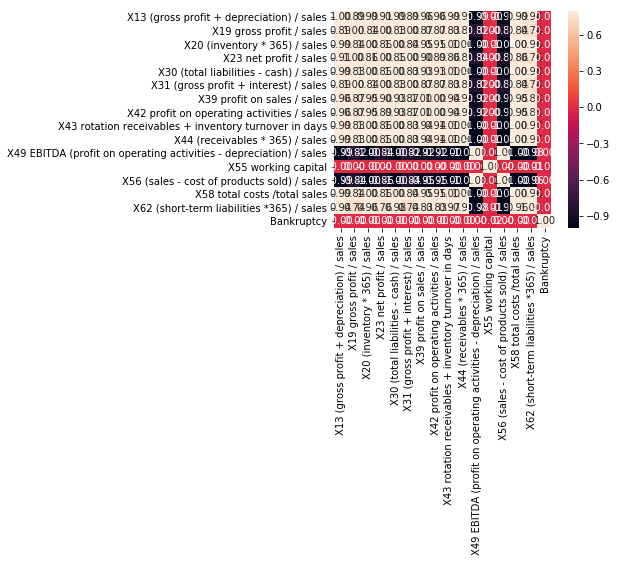

In [27]:
#Open graph modules to build corr matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corrmat = df.corr()
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, fmt = '.2f')
plt.show()

## Predicting the future from past information

# Using the neighbors algorithm from KNeighborsClassifier

In [6]:
#import appropriate machine learning packages to work with the data

from sklearn import preprocessing, neighbors, model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [7]:
#we implement the predictive model

X = np.array(df.drop(['Bankruptcy'], 1))
y = np.array(df['Bankruptcy'])

In [8]:
#we implement train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

#instantiate the classifier
clf = neighbors.KNeighborsClassifier(leaf_size = 10)

#fit the data to the model
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
accuracy = clf.score(X_test, y_test)
accuracy

0.9637268847795164

In [10]:
#now we make a loop to try different values for "leaf_size" parameter
lf_range = list(range(1,10))
lf_scores = []
for lf in lf_range:
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    clf = neighbors.KNeighborsClassifier(leaf_size = lf)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    lf_scores.append(accuracy.mean())
    print(lf, accuracy)   


1 0.9679943100995733
2 0.9701280227596017
3 0.9694167852062588
4 0.9658605974395448
5 0.9630156472261735
6 0.9665718349928877
7 0.9637268847795164
8 0.9679943100995733
9 0.9665718349928877


1


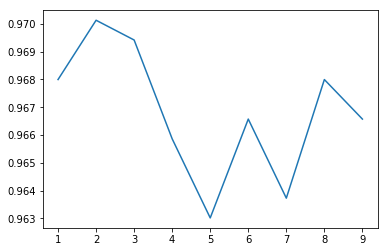

In [11]:
#which index has the max score?
print(lf_scores.index(max(lf_scores)))

#...and we plot results
plt.plot(lf_range, lf_scores)


In [12]:
#set up train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

#instantiate the classifier
clf = neighbors.KNeighborsClassifier(leaf_size = 6)

#fit the data to the model
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
accuracy

0.9566145092460882

# In search of better accuracy, we apply a different model to the data, this time we use a KNN model

In [13]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
scores

scores.max()

0.9715504978662873

In [14]:
#however, to gauge the precision of our model in out-of-sample data, it's better to calculate the man
scores.mean()

0.9665604703433652

In [15]:
#Now we search for an optimal value of K for KNN, trying with a different number of neighbors
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(scores)

[0.95596591 0.95732575 0.96728307 0.9658606  0.96870555 0.96443812
 0.96581197 0.96723647 0.96866097 0.96866097]


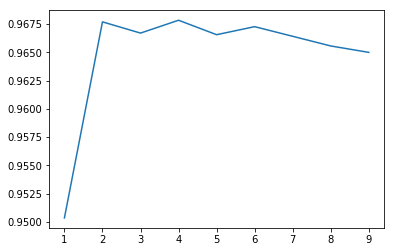

In [16]:
plt.plot(k_range, k_scores)


In [17]:
#This is the max value achieved with KNN, varying the number of neighbors
np.amax(scores)

0.968705547652916

In [18]:
np.mean(scores)

0.964994936623226

#### Testing the model by feeding data from an imaginary company

In [19]:
example_data = np.array([[0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277]])
example_data = example_data.reshape(len(example_data), -1)
clf.predict(example_data)

array([0], dtype=int64)

# Now we use a Linear Regression model and compare the first 4 results with the results in our dataset

In [20]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 4)
reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
pred = reg.predict(X_test)

In [22]:
#Now we compare the prediction for the first 4 predicted values with the actual values on the test table
print(pred[0], pred[1], pred[2], pred[3])
print(y_test)

0.05000841778687243 0.023329109084388733 0.02827129152125235 0.03636027474340392
[0 0 0 ... 0 0 0]


# Now we use a Logistic Regression model and find out its score with default parameters

In [26]:
from sklearn.linear_model import LogisticRegression
#instantiate the model (using the default parameters)
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X,y)

#predict the response values for the observations in X
logreg.predict(X)

#store the predicted values
y_pred = logreg.predict(X)

#we check how many predictions were generated
len(y_pred)

#compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9637113988899957


# Now we use a Decision Tree model

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.9758179231863442

# Now we use a Random Forest model with some random parameters

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 30, max_depth = 50, random_state = 15)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [38]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.9743954480796586

# Now we use a SVM model 

In [39]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.9580369843527738